In [1]:
# モジュールのインポート

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('house_price.csv')
y = pd.read_csv('y.csv')

In [23]:
data.shape

(1460, 290)

In [24]:
y.shape

(1460, 1)

In [25]:
df_data = pd.DataFrame(data,columns=data.columns)

In [26]:
df_y= pd.DataFrame(y,columns=['y'])

In [27]:
df = pd.concat([df_data, df_y], axis=1)

In [28]:
df.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,y
0,65,9.042040,1.098612,1.609438,1.609438,1.386294,7,1.791759,7.602900,7.602900,...,0,0,1,0,0,0,0,1,0,208500
1,80,9.169623,1.098612,1.609438,1.609438,1.386294,6,2.197225,7.589336,7.589336,...,0,0,1,0,0,0,0,1,0,181500
2,68,9.328212,1.098612,1.386294,1.609438,1.386294,7,1.791759,7.601902,7.602401,...,0,0,1,0,0,0,0,1,0,223500
3,60,9.164401,1.098612,1.386294,1.609438,1.386294,7,1.791759,7.557995,7.586296,...,0,0,1,1,0,0,0,0,0,140000
4,84,9.565284,1.098612,1.386294,1.609438,1.386294,8,1.791759,7.601402,7.601402,...,0,0,1,0,0,0,0,1,0,250000


In [30]:
df.drop(df[df['y']>=600000].index,inplace=True)

(array([   5.,    5.,   10.,    9.,   50.,   44.,   69.,   90.,  125.,
         150.,  110.,   93.,   98.,   97.,   68.,   57.,   47.,   50.,
          44.,   29.,   30.,   30.,   20.,   14.,   10.,   20.,   15.,
          11.,    6.,    4.,    6.,    9.,    7.,    3.,    3.,    3.,
           4.,    1.,    1.,    2.,    1.,    1.,    1.,    0.,    0.,
           1.,    0.,    2.,    0.,    1.]),
 array([  34900.  ,   45860.66,   56821.32,   67781.98,   78742.64,
          89703.3 ,  100663.96,  111624.62,  122585.28,  133545.94,
         144506.6 ,  155467.26,  166427.92,  177388.58,  188349.24,
         199309.9 ,  210270.56,  221231.22,  232191.88,  243152.54,
         254113.2 ,  265073.86,  276034.52,  286995.18,  297955.84,
         308916.5 ,  319877.16,  330837.82,  341798.48,  352759.14,
         363719.8 ,  374680.46,  385641.12,  396601.78,  407562.44,
         418523.1 ,  429483.76,  440444.42,  451405.08,  462365.74,
         473326.4 ,  484287.06,  495247.72,  506208.38, 

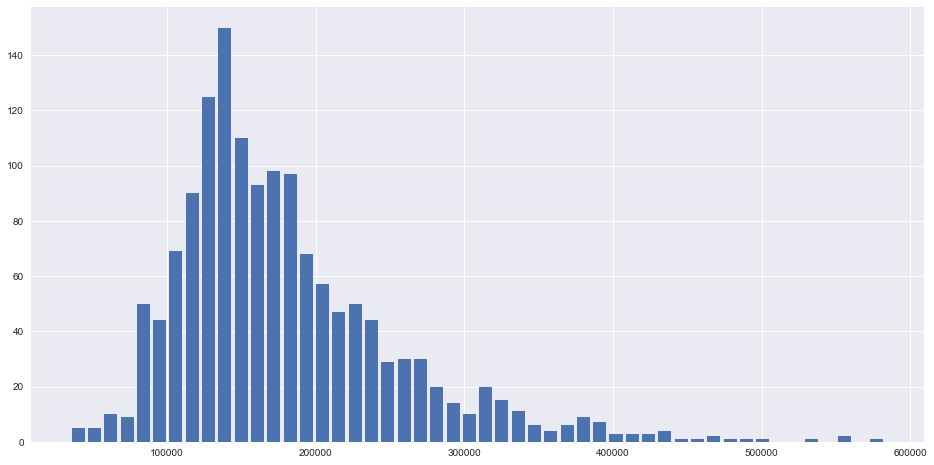

In [31]:
#y-hist
plt.figure(figsize=(16,8)) 
plt.hist( df['y'],bins=50,rwidth=0.8)

In [32]:
df.shape


(1456, 291)

In [33]:
X = data
y=y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [35]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [36]:
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print(' R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )



MSE train : 146778283.851, test : 1294381017.216
 R^2 train : 0.976, test : 0.809


In [37]:
# 必要なライブラリのインポート
from sklearn.grid_search import GridSearchCV
# 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
params = {'n_estimators'  : [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}

In [39]:
# モデルにインスタンス生成
mod = RandomForestRegressor()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed w

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed w

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 10, 100, 1000, 10000], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [40]:
y_train_predcv = cv.predict(X_train)
y_test_predcv = cv.predict(X_test)

In [42]:
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_predcv), mean_squared_error(y_test, y_test_predcv)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_predcv), r2_score(y_test, y_test_predcv)) )


MSE train : 108464661.563, test : 944955417.587
R^2 train : 0.982, test : 0.861
